In [90]:
import numpy as np
import os, sys
from scipy.ndimage import imread
from scipy.misc import imresize
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import scipy 
from skimage.segmentation import slic
from skimage.segmentation import find_boundaries, mark_boundaries

from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

In [91]:
# 0. Read the images
path_ncmunico = "../ncmsunicos/{'0202'}"
file_list = [os.path.join(path_ncmunico, f) for f in 
             os.listdir(path_ncmunico)]


In [92]:
im_list = [img_as_float( ( (imread(filename,mode='F') - 0 )/ 255 ) )  for filename in file_list[:4]]

/home/ivan/pybr/ajna_docs/padma/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


In [93]:
print(im_list[0])

[[0.97647059 1.         1.         ... 0.98431373 1.         0.95686275]
 [0.95294118 0.98039216 0.99607843 ... 0.97647059 0.99607843 0.98823529]
 [0.96862745 0.98039216 0.98431373 ... 0.99215686 0.94117647 0.95294118]
 ...
 [0.40000001 0.1882353  0.02352941 ... 0.2        0.04705882 0.        ]
 [0.66666669 0.25882354 0.03921569 ... 0.47058824 0.10588235 0.02352941]
 [0.58431375 0.10588235 0.         ... 0.48235294 0.14117648 0.03137255]]


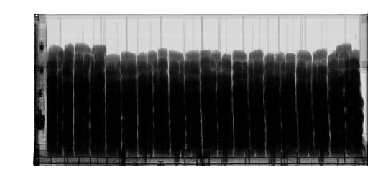

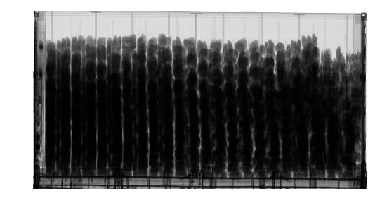

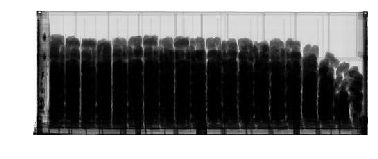

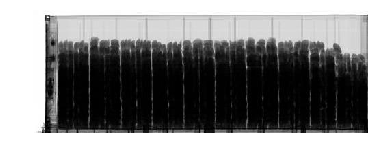

In [94]:
for im in im_list:
    plt.axis('off')
    plt.imshow(im, cmap='gray')
    plt.show()

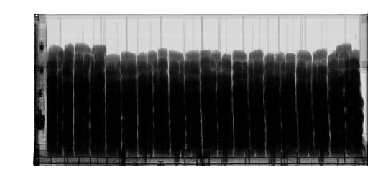

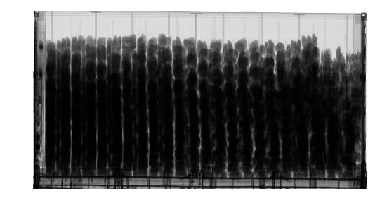

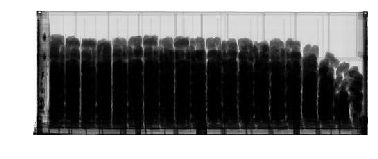

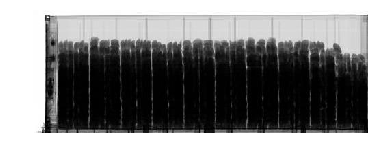

In [95]:
# 1. Identity
kernel = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0]
])

def apply_and_plot(im_list,  kernel):
    for im in im_list:
        temp = convolve2d(im, kernel, mode='same')
        plt.axis('off')
        plt.imshow(temp,cmap='gray')
        plt.show()

apply_and_plot(im_list, kernel)

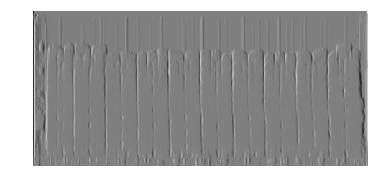

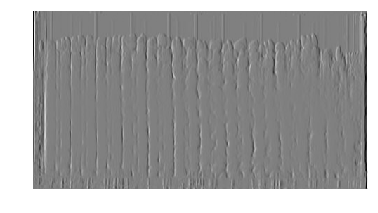

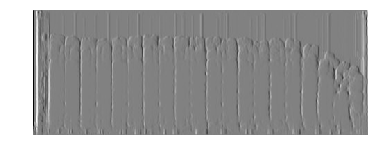

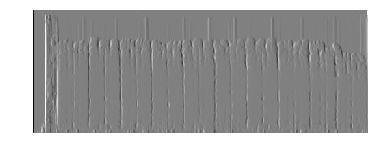

In [96]:
# 2. Edge Detection (Horizontal)
kernel = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

apply_and_plot(im_list, kernel)

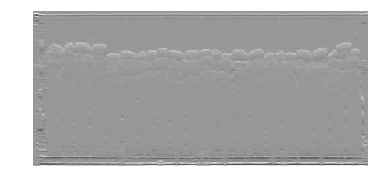

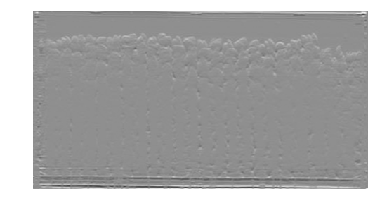

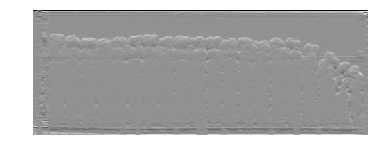

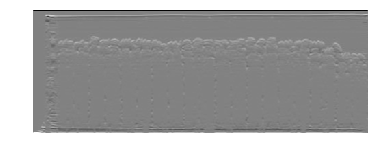

In [97]:
# 3. Edge Detection (Vertical)
kernel = np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1]
])
apply_and_plot(im_list, kernel)

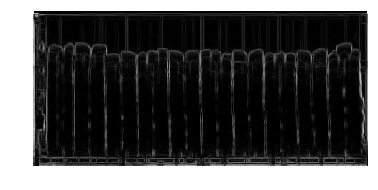

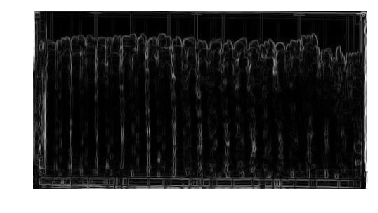

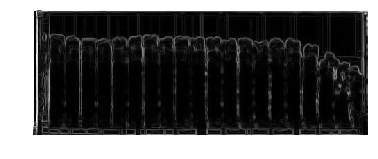

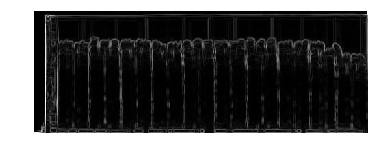

In [98]:
# 4. Gradient Magnitude
kernerl1 = np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1]
])
kernerl2 = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

for im in im_list:
    temp1 = convolve2d(im, kernerl1, mode='same')
    temp2 = convolve2d(im, kernerl2, mode='same')
    
    temp3 = np.sqrt(temp1**2 + temp2**2)

    plt.axis('off')
    plt.imshow(temp3,cmap='gray')
    plt.show()

/home/ivan/pybr/ajna_docs/padma/venv/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/ivan/pybr/ajna_docs/padma/venv/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


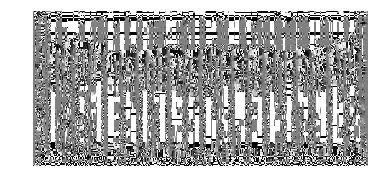

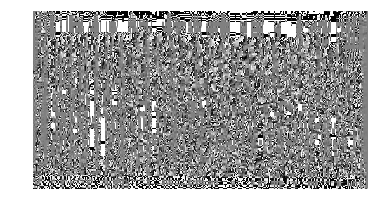

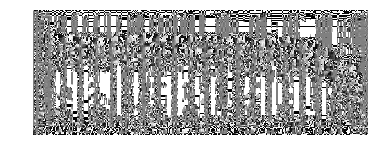

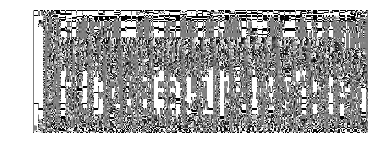

In [99]:
# 5. Gradient Direction
kernerl1 = np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1]
])
kernerl2 = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

for im in im_list:
    temp1 = convolve2d(im, kernerl1, mode='same')
    temp2 = convolve2d(im, kernerl2, mode='same')
    temp3 = np.arctan(temp1/temp2)

    plt.axis('off')
    plt.imshow(temp3,cmap='gray')
    plt.show()

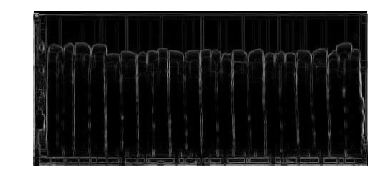

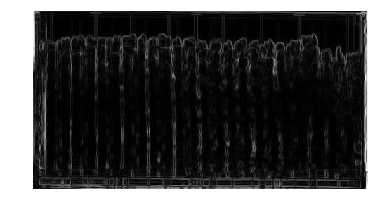

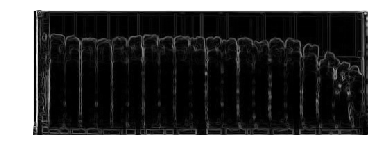

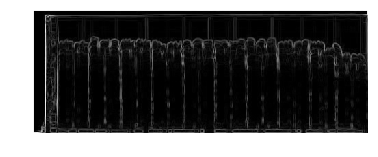

In [100]:
# 6. Sobel Gradient Magnitude
kernerl1 = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])
kernerl2 = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

for im in im_list:
    temp1 = convolve2d(im, kernerl1, mode='same')
    temp2 = convolve2d(im, kernerl2, mode='same')
    temp3 = np.sqrt(temp1**2 + temp2**2)
   
    plt.axis('off')
    plt.imshow(temp3,cmap='gray')
    plt.show()

/home/ivan/pybr/ajna_docs/padma/venv/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/ivan/pybr/ajna_docs/padma/venv/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


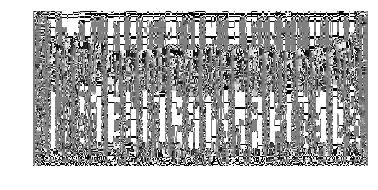

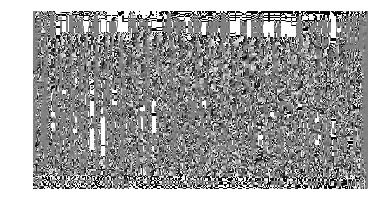

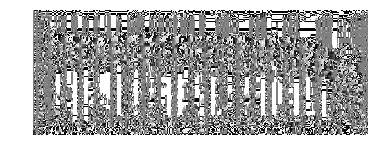

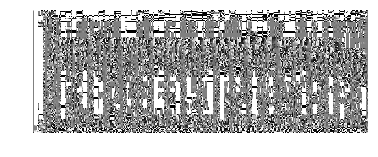

In [101]:
# 7. Sobel Gradient Direction
kernerl1 = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])
kernerl2 = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

for im in im_list:
    temp1 = convolve2d(im, kernerl1, mode='same')
    temp2 = convolve2d(im, kernerl2, mode='same')
    temp3 = np.arctan(temp1/temp2)

    plt.axis('off')
    plt.imshow(temp3,cmap='gray')
    plt.show()

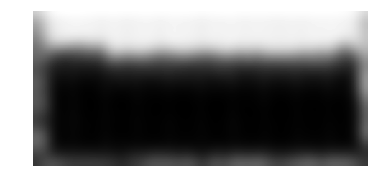

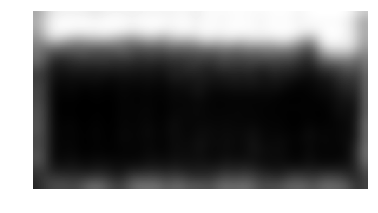

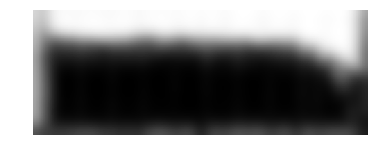

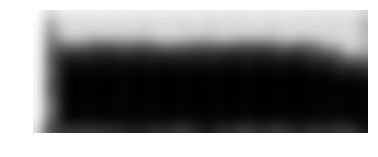

In [102]:
# 8. Guassian Blur
for im in im_list:
    temp = scipy.ndimage.filters.gaussian_filter(
        im,
        sigma = 10
        )
    plt.axis('off')
    plt.imshow(temp,cmap='gray')
    plt.show()

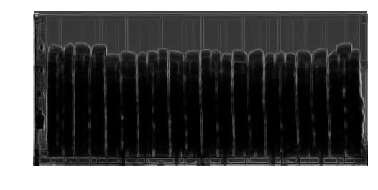

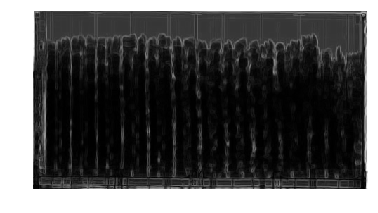

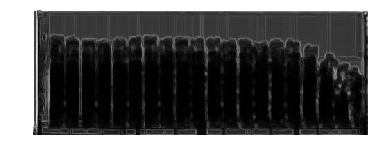

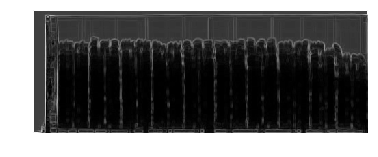

In [103]:
# 9. Sharpening
kernerl1 = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])
kernerl2 = np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
])

for im in im_list:
    temp1 = convolve2d(im, kernerl1, mode='same')
    temp2 = convolve2d(im, kernerl2, mode='same')    
    temp3 = np.sqrt(temp1**2 + temp2**2)
    plt.axis('off')
    plt.imshow(temp3 + im ,cmap='gray')
    plt.show()

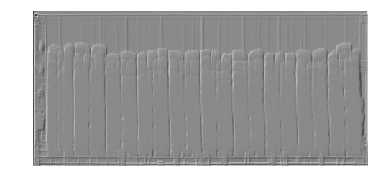

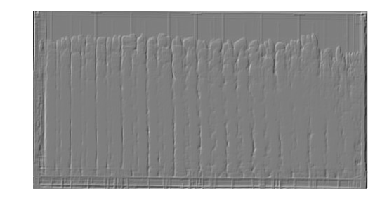

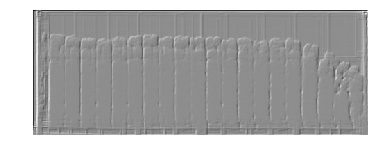

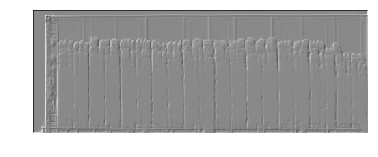

In [104]:
# 10. Emboss
kernerl = np.array([
    [-1,-1,0],
    [-1,0,1],
    [0,1,1]
])

for im in im_list:
    temp = convolve2d(im,kernerl,mode='same') + 128
    plt.axis('off')
    plt.imshow(temp,cmap='gray')
    plt.show()

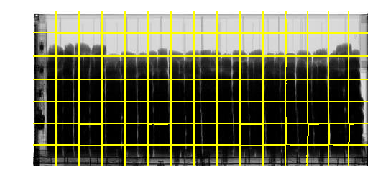

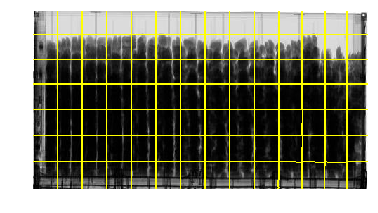

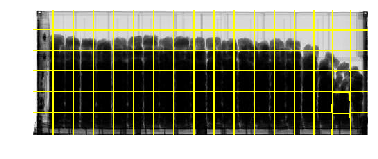

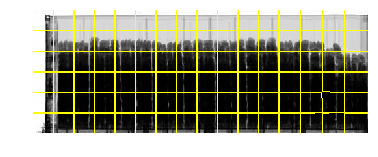

In [105]:
# 11. Super Pixel
for im in im_list:
    segments = slic(im)
    #, n_segments =50, sigma = 10)
    plt.axis('off')
    plt.imshow(mark_boundaries(im, segments))
    plt.show()

Felzenszwalb number of segments: 534
SLIC number of segments: 21
WaterShed number of segments: 8


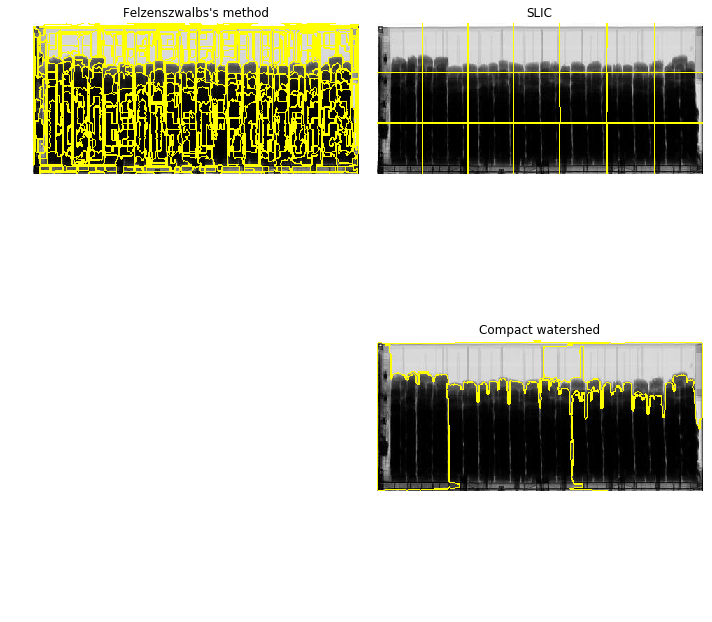

In [141]:
img = im_list[0]
segments_fz = felzenszwalb(img, scale=10, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=24)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=8, compactness=0.001)

print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz))))
print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))
print('WaterShed number of segments: {}'.format(len(np.unique(segments_watershed))))

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

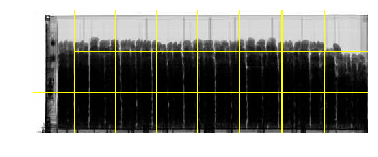

In [255]:
from random import randint
rand = randint(0, len(im_list) - 1)
img = im_list[rand]
segments = slic(img, n_segments=24)
plt.axis('off')
plt.imshow(mark_boundaries(img, segments))
plt.show()

(179, 490)
(179, 490)
[0 0]
[59 60]
24


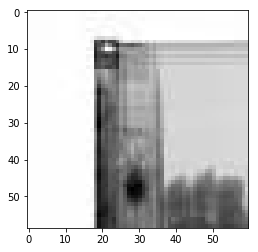

In [256]:
print(segments.shape)
print(img.shape)
plt.imshow(segments, cmap='gray')
segment0 = np.argwhere(segments == 0)
#print(segment0)
print(segment0[0])
print(segment0[-1])
print(len(np.unique(segments)))
cropped = img[segment0[0][0]:segment0[-1][0], segment0[0][-1]:segment0[-1][-1]]
plt.imshow(cropped, cmap='gray')


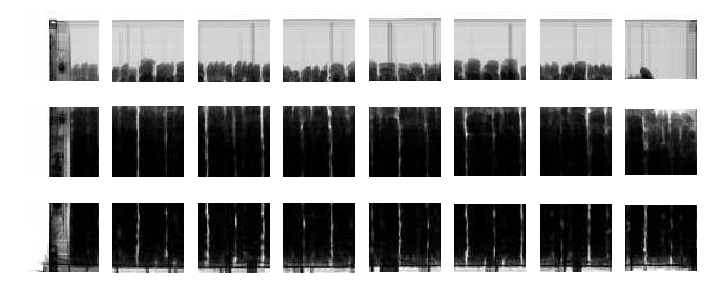

In [257]:
cols = 8
rows = 3
plt.figure(figsize=(12, 5))
def make_crops(segments, img):
    crops = []
    index = 0
    for (i, segval) in enumerate(np.unique(segments)):
        index += 1
        plt.axis('off')
        plt.subplot(rows, cols, index)
        segment = np.argwhere(segments == segval)
        cropped = img[segment[0][0]:segment[-1][0], segment[0][-1]:segment[-1][-1]]
        crops.append(cropped)
        plt.imshow(cropped, cmap='gray')
    plt.axis('off')
    plt.show()
    return crops

crops = make_crops(segments, img)

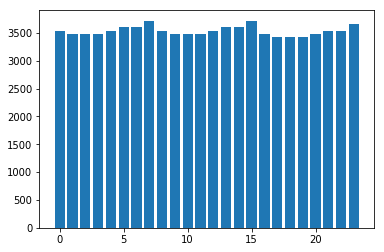

In [258]:
lens = []
for im in crops:
    lens.append(im.shape[0]*im.shape[1])
plt.bar(range(len(lens)), lens)
height = min(lens)

In [259]:
from sklearn.metrics.pairwise import euclidean_distances
## Jogar todos os segmentos em um único array
X = np.zeros((24, height))
for i, im in enumerate(crops):
    X[i, :] = im.flatten()[:height]

line_distances = []
distances = euclidean_distances(X[0:8], [X[5]])
line_distances.append(distances)
print(distances.shape)
print(distances.mean(), distances.max())
distances = euclidean_distances(X[8:16], [X[13]])
line_distances.append(distances)
print(distances.shape)
print(distances.mean(), distances.max())
distances = euclidean_distances(X[16:24], [X[21]])
line_distances.append(distances)
print(distances.shape)
print(distances.mean(), distances.max())
distances = euclidean_distances(X, [X[0]])
print(distances.shape)
print(distances.mean(), distances.max())


(8, 1)
7.771793292732405 15.200073663613011
(8, 1)
8.886325221442814 31.834479214194015
(8, 1)
7.805684293627711 32.21511401885482
(24, 1)
32.585552354878295 45.533885490887


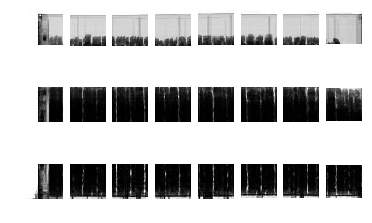

In [260]:
for (i, crop) in enumerate(crops):
    plt.axis('off')
    plt.subplot(rows, cols, i+1)
    plt.imshow(crop, cmap='gray')
plt.axis('off')
plt.show()

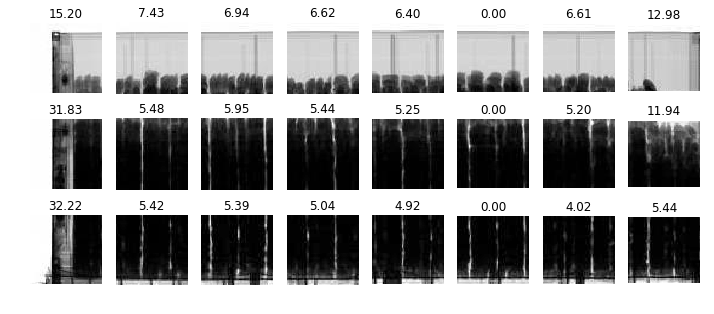

In [261]:
index = 0
fig = plt.figure(figsize=(12, 5))
for row in range(0, 3):
    for (i, crop) in enumerate(crops[row * 8: (row+1) * 8]):
        index += 1
        plt.axis('off')
        ax = fig.add_subplot(rows, cols, index)
        plt.imshow(crop, cmap='gray')
        ax.set(title='%0.2f' % line_distances[row][i])
plt.axis('off')
plt.show()

/home/ivan/pybr/ajna_docs/padma/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


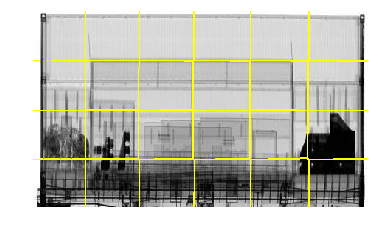

24


In [262]:
filename = '../images/aclu9773886.jpg'
img2 = img_as_float( ( (imread(filename,mode='F') - 0 )/ 255 ) )
segments2 = slic(img2, n_segments=24)
plt.axis('off')
plt.imshow(mark_boundaries(img2, segments2))
plt.show()
print(len(np.unique(segments2)))

/home/ivan/pybr/ajna_docs/padma/venv/lib/python3.5/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))


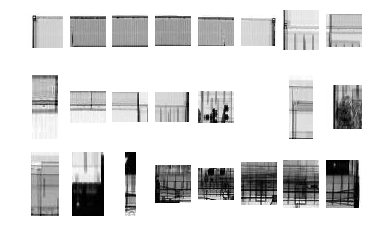

In [263]:
crops2 = make_crops(segments2, img2)

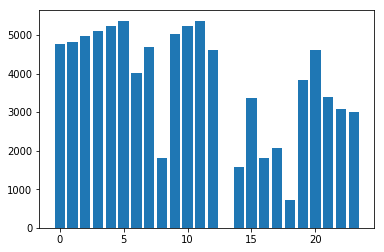

In [253]:
lens = []
for im in crops2:
    size = 
    lens.append(im.shape[0]*im.shape[1])
plt.bar(range(len(lens)), lens)
height = min(lens)

In [254]:
X = np.zeros((24, height))
for i, im in enumerate(crops2):
    X[i, :] = im.flatten()[:height]

line_distances = []
distances = euclidean_distances(X[0:8], [X[5]])
line_distances.append(distances)
print(distances.shape)
print(distances.mean(), distances.max())
distances = euclidean_distances(X[8:16], [X[13]])
line_distances.append(distances)
print(distances.shape)
print(distances.mean(), distances.max())
distances = euclidean_distances(X[16:24], [X[21]])
line_distances.append(distances)
print(distances.shape)
print(distances.mean(), distances.max())
distances = euclidean_distances(X, [X[0]])
print(distances.shape)
print(distances.mean(), distances.max())

ValueError: Found array with 0 feature(s) (shape=(8, 0)) while a minimum of 1 is required by check_pairwise_arrays.